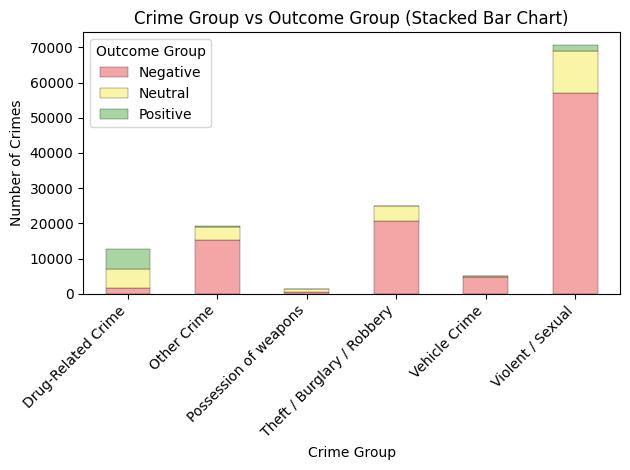

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV - update the path if needed
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Define your crime groups mapping
crime_group_map = {
    'Violence and sexual offences': 'Violent / Sexual',
    'Criminal damage and arson': 'Violent / Sexual',
    'Possession of weapons': 'Possession of weapons',
    'Vehicle crime': 'Vehicle Crime',
    'Burglary': 'Theft / Burglary / Robbery',
    'Theft from the person': 'Theft / Burglary / Robbery',
    'Shoplifting': 'Theft / Burglary / Robbery',
    'Other theft': 'Theft / Burglary / Robbery',
    'Bicycle theft': 'Theft / Burglary / Robbery',
    'Drugs': 'Drug-Related Crime',
    'Anti-social behaviour': 'Anti-Social Behaviour',
    'Other crime': 'Other Crime',
    'Public order': 'Other Crime',
    'Robbery': 'Theft / Burglary / Robbery',
}

# Define your outcome groups mapping
outcome_group_map = {
    'Action to be taken by another organisation': 'Positive',
    'Offender given a drugs possession warning': 'Positive',
    'Suspect charged as part of another case': 'Positive',
    'Offender given a caution': 'Positive',
    'Local resolution': 'Positive',
    'Status update unavailable': 'Neutral',
    'Under investigation': 'Neutral',
    'Awaiting court outcome': 'Neutral',
    'Court result unavailable': 'Neutral',
    'Unable to prosecute suspect': 'Negative',
    'Investigation complete; no suspect identified': 'Negative',
    'Further action is not in the public interest': 'Negative',
    'Further investigation is not in the public interest': 'Negative',
    'Formal action is not in the public interest': 'Negative',
    'ASB_FILL': 'Exclude',  # To exclude Anti-social behaviour fill
}

# Map crime groups
df['crime_group'] = df['crime_type'].map(crime_group_map)

# Map outcome groups
df['outcome_group'] = df['last_outcome_category'].map(outcome_group_map)

# Filter out Anti-social behaviour and any rows with missing mappings
df_filtered = df[(df['crime_group'] != 'Anti-Social Behaviour') & (df['outcome_group'] != 'Exclude') & df['crime_group'].notna() & df['outcome_group'].notna()]

# Group by crime group and outcome group and count
grouped = df_filtered.groupby(['crime_group', 'outcome_group']).size().unstack(fill_value=0)

colors = {
    'Positive': '#a8d5a2',  # pastel green
    'Neutral': '#f9f4a6',   # pastel yellow
    'Negative': '#f4a6a6'   # pastel red
}

outcome_types = grouped.columns.tolist()  # get the order of outcome groups from the DataFrame

ax = grouped.plot(kind='bar', stacked=True, color=[colors[key] for key in outcome_types],edgecolor='black',linewidth=0.2 )


plt.title('Crime Group vs Outcome Group (Stacked Bar Chart)')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome Group')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/crime_outcome_stacked_bar.png', dpi=300, bbox_inches='tight')
plt.show()

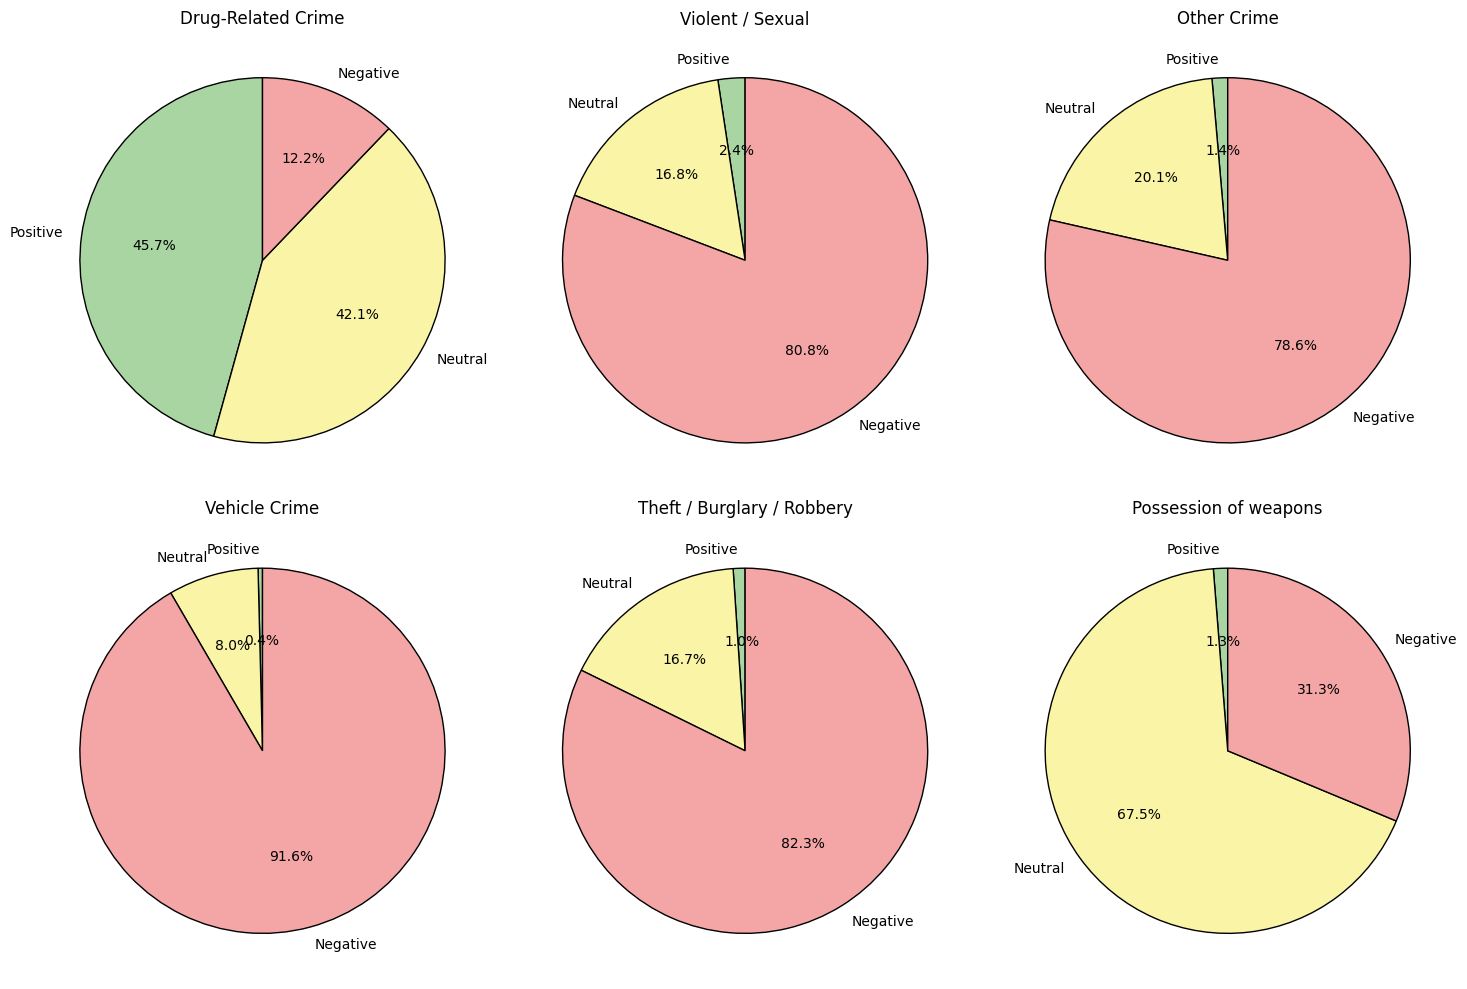

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Crime group mapping
crime_group_map = {
    'Violence and sexual offences': 'Violent / Sexual',
    'Criminal damage and arson': 'Violent / Sexual',
    'Possession of weapons': 'Possession of weapons',
    'Vehicle crime': 'Vehicle Crime',
    'Burglary': 'Theft / Burglary / Robbery',
    'Theft from the person': 'Theft / Burglary / Robbery',
    'Shoplifting': 'Theft / Burglary / Robbery',
    'Other theft': 'Theft / Burglary / Robbery',
    'Bicycle theft': 'Theft / Burglary / Robbery',
    'Drugs': 'Drug-Related Crime',
    'Anti-social behaviour': 'Anti-Social Behaviour',
    'Other crime': 'Other Crime',
    'Public order': 'Other Crime',
    'Robbery': 'Theft / Burglary / Robbery',
}

# Outcome group mapping
positive_outcomes = [
    'Action to be taken by another organisation',
    'Offender given a drugs possession warning',
    'Suspect charged as part of another case',
    'Offender given a caution',
    'Local resolution'
]

neutral_outcomes = [
    'Status update unavailable',
    'Under investigation',
    'Awaiting court outcome',
    'Court result unavailable'
]

negative_outcomes = [
    'Unable to prosecute suspect',
    'Investigation complete; no suspect identified',
    'Further action is not in the public interest',
    'Further investigation is not in the public interest',
    'Formal action is not in the public interest'
]

def map_outcome(outcome):
    if outcome in positive_outcomes:
        return 'Positive'
    elif outcome in neutral_outcomes:
        return 'Neutral'
    elif outcome in negative_outcomes:
        return 'Negative'
    else:
        return 'Unknown'

# Map crime_group and outcome_group
df['crime_group'] = df['crime_type'].map(crime_group_map)
df['outcome_group'] = df['last_outcome_category'].map(map_outcome)

# Filter out unwanted rows: missing groups or Anti-Social Behaviour if you want to exclude it
df_filtered = df[
    df['crime_group'].notna() &
    df['outcome_group'].isin(['Positive', 'Neutral', 'Negative'])
    # Uncomment next line if you want to exclude ASB
    # & (df['crime_group'] != 'Anti-Social Behaviour')
]

# Colors for pie charts
colors = {
    'Positive': '#a8d5a2',  # pastel green
    'Neutral': '#f9f4a6',   # pastel yellow
    'Negative': '#f4a6a6'   # pastel red
}

# Get unique crime groups present in filtered data
crime_groups = df_filtered['crime_group'].unique()

# Setup subplots (adjust rows/cols to fit your number of groups)
import math
cols = 3
rows = math.ceil(len(crime_groups) / cols)
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
axs = axs.flatten()

for i, group in enumerate(crime_groups):
    subset = df_filtered[df_filtered['crime_group'] == group]
    counts = subset['outcome_group'].value_counts()
    
    # Make sure all outcome groups appear in counts for color mapping
    counts = counts.reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
    
    pie_colors = [colors.get(key, '#cccccc') for key in counts.index]  # fallback color if key missing

    axs[i].pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    colors=pie_colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    axs[i].set_title(group)

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/crime_outcome_pies.png', dpi=300, bbox_inches='tight')
plt.show()

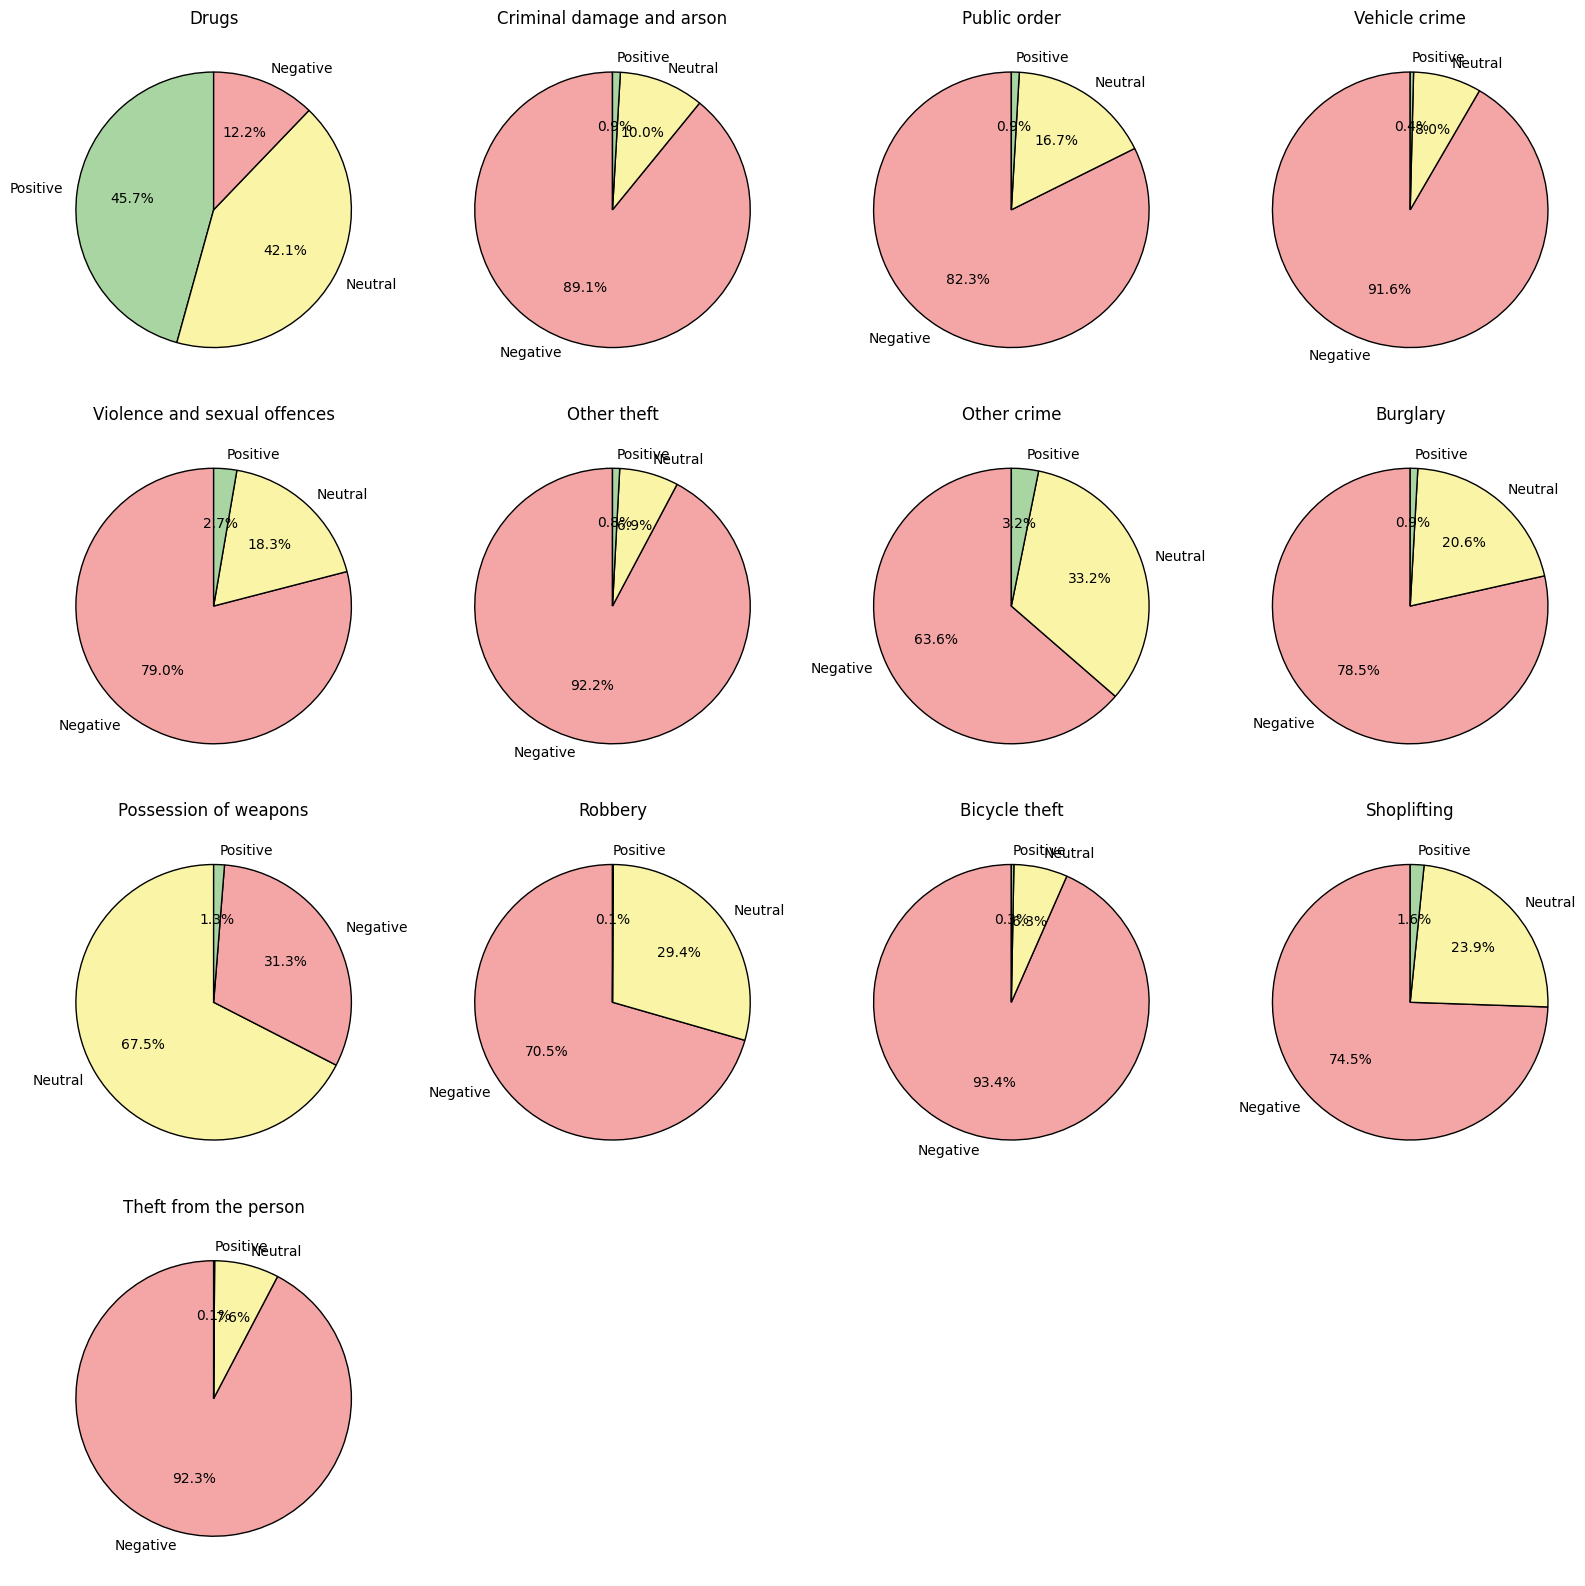

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Outcome groups mapping
outcome_group_map = {
    'Action to be taken by another organisation': 'Positive',
    'Offender given a drugs possession warning': 'Positive',
    'Suspect charged as part of another case': 'Positive',
    'Offender given a caution': 'Positive',
    'Local resolution': 'Positive',
    'Status update unavailable': 'Neutral',
    'Under investigation': 'Neutral',
    'Awaiting court outcome': 'Neutral',
    'Court result unavailable': 'Neutral',
    'Unable to prosecute suspect': 'Negative',
    'Investigation complete; no suspect identified': 'Negative',
    'Further action is not in the public interest': 'Negative',
    'Further investigation is not in the public interest': 'Negative',
    'Formal action is not in the public interest': 'Negative',
    'ASB_FILL': 'Exclude',  # just in case
}

# Map outcome groups
df['outcome_group'] = df['last_outcome_category'].map(outcome_group_map)

# Filter out unknown / excluded outcomes and any missing data
df_filtered = df[df['outcome_group'].isin(['Positive', 'Neutral', 'Negative']) & df['outcome_group'].notna()]

# Unique crime types to plot
crime_types = df_filtered['crime_type'].unique()

# Colors for pie
colors = {
    'Positive': '#a8d5a2',  # pastel green
    'Neutral': '#f9f4a6',   # pastel yellow
    'Negative': '#f4a6a6'   # pastel red
}

# Determine grid size (e.g., 4 columns)
cols = 4
rows = (len(crime_types) + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
axs = axs.flatten()

for i, crime in enumerate(crime_types):
    subset = df_filtered[df_filtered['crime_type'] == crime]
    counts = subset['outcome_group'].value_counts()
    
    pie_colors = [colors.get(key, '#cccccc') for key in counts.index]
    
    axs[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=pie_colors,
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    axs[i].set_title(crime)
    axs[i].axis('equal')  # keep pie circular

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()

# Save the figure
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/crime_type_vs_outcome_pies.png', dpi=300)
plt.show()


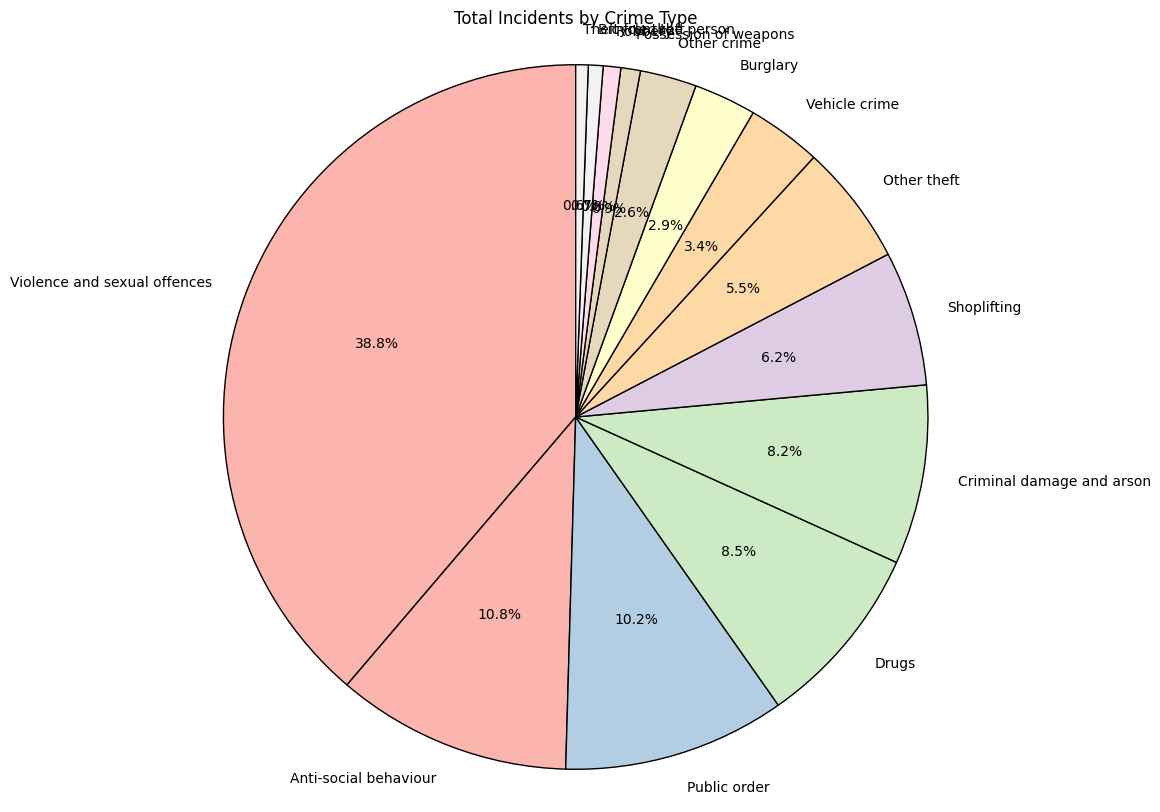

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Count total incidents by crime_type
crime_counts = df['crime_type'].value_counts()

# Colors - generate pastel colors automatically or define manually
# Here I create a pastel colormap for all crime types
import matplotlib.colors as mcolors
import numpy as np

num_types = len(crime_counts)
colors = plt.cm.Pastel1(np.linspace(0, 1, num_types))

# Plot pie chart
plt.figure(figsize=(10,10))
plt.pie(
    crime_counts,
    labels=crime_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Total Incidents by Crime Type')
plt.axis('equal')  # Keep pie circular

# Save figure
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/total_incidents_by_crime_type.png', dpi=300)
plt.show()


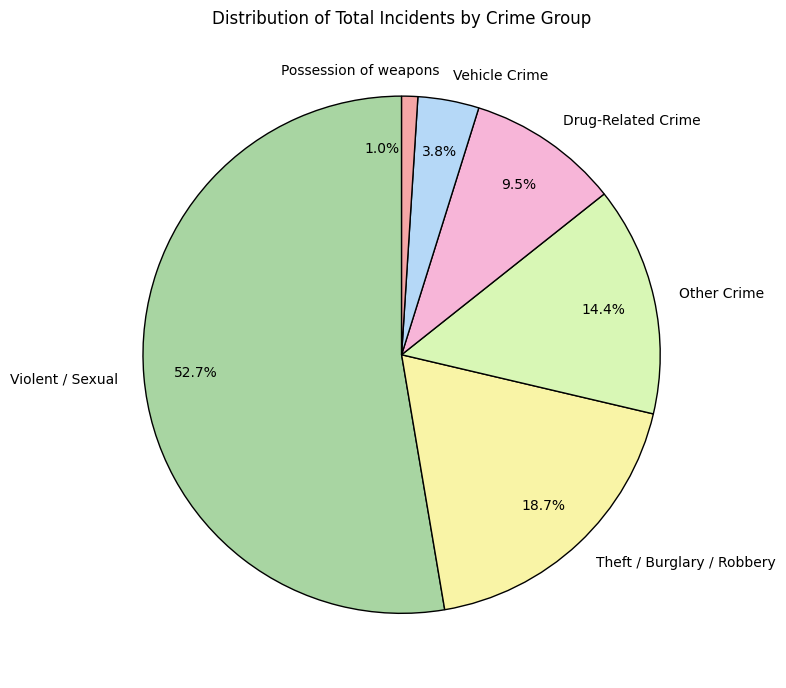

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Crime groups mapping
crime_group_map = {
    'Violence and sexual offences': 'Violent / Sexual',
    'Criminal damage and arson': 'Violent / Sexual',
    'Possession of weapons': 'Possession of weapons',
    'Vehicle crime': 'Vehicle Crime',
    'Burglary': 'Theft / Burglary / Robbery',
    'Theft from the person': 'Theft / Burglary / Robbery',
    'Shoplifting': 'Theft / Burglary / Robbery',
    'Other theft': 'Theft / Burglary / Robbery',
    'Bicycle theft': 'Theft / Burglary / Robbery',
    'Drugs': 'Drug-Related Crime',
    'Anti-social behaviour': 'Anti-Social Behaviour',
    'Other crime': 'Other Crime',
    'Public order': 'Other Crime',
    'Robbery': 'Theft / Burglary / Robbery',
}

# Map crime groups
df['crime_group'] = df['crime_type'].map(crime_group_map)

# Exclude Anti-Social Behaviour for this pie chart
df_filtered = df[df['crime_group'] != 'Anti-Social Behaviour']

# Count incidents by crime group
group_counts = df_filtered['crime_group'].value_counts()

# Pastel colors mapped to crime groups (ensure order matches group_counts)
color_map = {
    'Violent / Sexual': '#a8d5a2',         # pastel green
    'Theft / Burglary / Robbery': '#f9f4a6',  # pastel yellow
    'Possession of weapons': '#f4a6a6',    # pastel red
    'Vehicle Crime': '#b5d8f7',             # pastel blue
    'Drug-Related Crime': '#f7b5d8',        # pastel pink
    'Other Crime': '#d8f7b5',                # pastel lime
}
colors = [color_map.get(k, '#cccccc') for k in group_counts.index]

# Explode the "Possession of weapons" slice
explode = [0]*len(group_counts)
try:
    idx = group_counts.index.get_loc('Possession of weapons')
    explode[idx] = 0.1  # slightly pull out the slice
except KeyError:
    pass

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(
    group_counts,
    labels=group_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    labeldistance=1.1,
    pctdistance=0.8,
    textprops={'fontsize': 10}
)

# Move label and pct text of 'Possession of weapons' LEFT
# Move label and pct text of 'Possession of weapons' LEFT and label slightly UP
try:
    idx = group_counts.index.get_loc('Possession of weapons')

    # Current positions
    label_pos = texts[idx].get_position()
    pct_pos = autotexts[idx].get_position()

    # Shift label LEFT and UP
    texts[idx].set_position((label_pos[0] - 0.5, label_pos[1] + 0.0))
    # Shift percentage LEFT only (same height)
    autotexts[idx].set_position((pct_pos[0] - 0.1, pct_pos[1]))
except KeyError:
    pass


plt.title('Distribution of Total Incidents by Crime Group')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/crime_group_pie_chart.png')
plt.show()
   


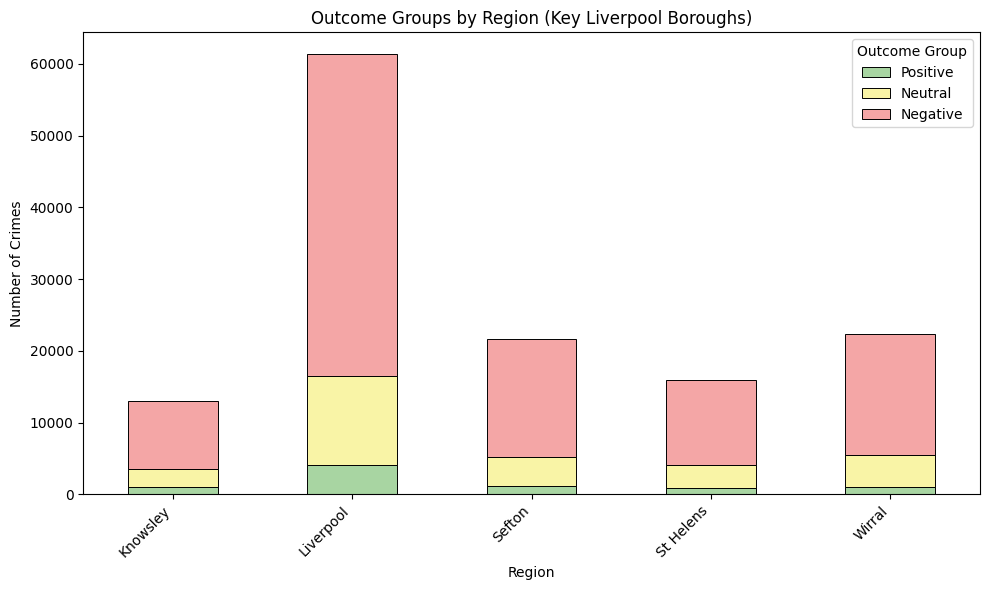

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Map crime groups if not already done
crime_group_map = {
    'Violence and sexual offences': 'Violent / Sexual',
    'Criminal damage and arson': 'Violent / Sexual',
    'Possession of weapons': 'Possession of weapons',
    'Vehicle crime': 'Vehicle Crime',
    'Burglary': 'Theft / Burglary / Robbery',
    'Theft from the person': 'Theft / Burglary / Robbery',
    'Shoplifting': 'Theft / Burglary / Robbery',
    'Other theft': 'Theft / Burglary / Robbery',
    'Bicycle theft': 'Theft / Burglary / Robbery',
    'Drugs': 'Drug-Related Crime',
    'Anti-social behaviour': 'Anti-Social Behaviour',
    'Other crime': 'Other Crime',
    'Public order': 'Other Crime',
    'Robbery': 'Theft / Burglary / Robbery',
}
df['crime_group'] = df['crime_type'].map(crime_group_map)

# Map outcome groups if not already done
outcome_group_map = {
    'Action to be taken by another organisation': 'Positive',
    'Offender given a drugs possession warning': 'Positive',
    'Suspect charged as part of another case': 'Positive',
    'Offender given a caution': 'Positive',
    'Local resolution': 'Positive',
    'Status update unavailable': 'Neutral',
    'Under investigation': 'Neutral',
    'Awaiting court outcome': 'Neutral',
    'Court result unavailable': 'Neutral',
    'Unable to prosecute suspect': 'Negative',
    'Investigation complete; no suspect identified': 'Negative',
    'Further action is not in the public interest': 'Negative',
    'Further investigation is not in the public interest': 'Negative',
    'Formal action is not in the public interest': 'Negative',
    'ASB_FILL': 'Exclude',  # Exclude Anti-social behaviour fill
}
df['outcome_group'] = df['last_outcome_category'].map(outcome_group_map)

# Extract region from start of 'lsoa_name'
df['region'] = df['lsoa_name'].str.extract(r'^(Sefton|Liverpool|St.|Wirral|Knowsley)')

# Filter to only those 5 regions (drop NaNs from others)
df_region = df[df['region'].notna()]

# Filter out any rows with outcome_group as NaN or 'Exclude'
df_region = df_region[(df_region['outcome_group'].notna()) & (df_region['outcome_group'] != 'Exclude')]

# Group by region and outcome_group
grouped = df_region.groupby(['region', 'outcome_group']).size().unstack(fill_value=0)

# Pastel colors for outcome groups
colors = {
    'Positive': '#a8d5a2',  # pastel green
    'Neutral': '#f9f4a6',   # pastel yellow
    'Negative': '#f4a6a6'   # pastel red
}

# Make sure columns are in this order for consistent plotting
outcome_order = ['Positive', 'Neutral', 'Negative']
grouped = grouped[outcome_order]

# Plot stacked bar chart with black outlines
ax = grouped.plot(
    kind='bar',
    stacked=True,
    color=[colors[outcome] for outcome in grouped.columns],
    edgecolor='black',
    linewidth=0.7,
    figsize=(10,6)
)

# After plotting your grouped bar chart (ax is the Axes object)
labels = [label.get_text() for label in ax.get_xticklabels()]
# Replace 'St.' with 'St Helens'
new_labels = ['St Helens' if lbl == 'St.' else lbl for lbl in labels]
ax.set_xticklabels(new_labels, rotation=45, ha='right')

plt.title('Outcome Groups by Region (Key Liverpool Boroughs)')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome Group')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/outcome_groups_by_region_stacked_bar.png')
plt.show()



In [43]:
df.head()

,crime_id,month,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category,crime_group,outcome_group
0,7c903b55af24fe6dab7eb96fe696f8e7d57e05817f6730...,2024-06-01,-2.746819,53.389101,On or near Further/Higher Educational Building,E01012393,Halton 001B,Drugs,Local resolution,Drug-Related Crime,Positive
1,461fe1ff825ef4cc740dafe58e9015449696d80978580a...,2024-06-01,-2.798814,53.354705,On or near Old Higher Road,E01012391,Halton 008B,Criminal damage and arson,Investigation complete; no suspect identified,Violent / Sexual,Negative
2,ASB_FILL,2024-06-01,-2.871827,53.489763,On or near Gilescroft Avenue,E01006448,Knowsley 001A,Anti-social behaviour,ASB_FILL,Anti-Social Behaviour,Exclude
3,ebeec31356de0e9219711d81f3d8006d33c275e04e9e7a...,2024-06-01,-2.871229,53.489300,On or near Watts Close,E01006448,Knowsley 001A,Criminal damage and arson,Investigation complete; no suspect identified,Violent / Sexual,Negative
4,b04da555d9c4f211ce48bf6453dc0f6257c63785727ec6...,2024-06-01,-2.871827,53.489763,On or near Gilescroft Avenue,E01006448,Knowsley 001A,Criminal damage and arson,Unable to prosecute suspect,Violent / Sexual,Negative


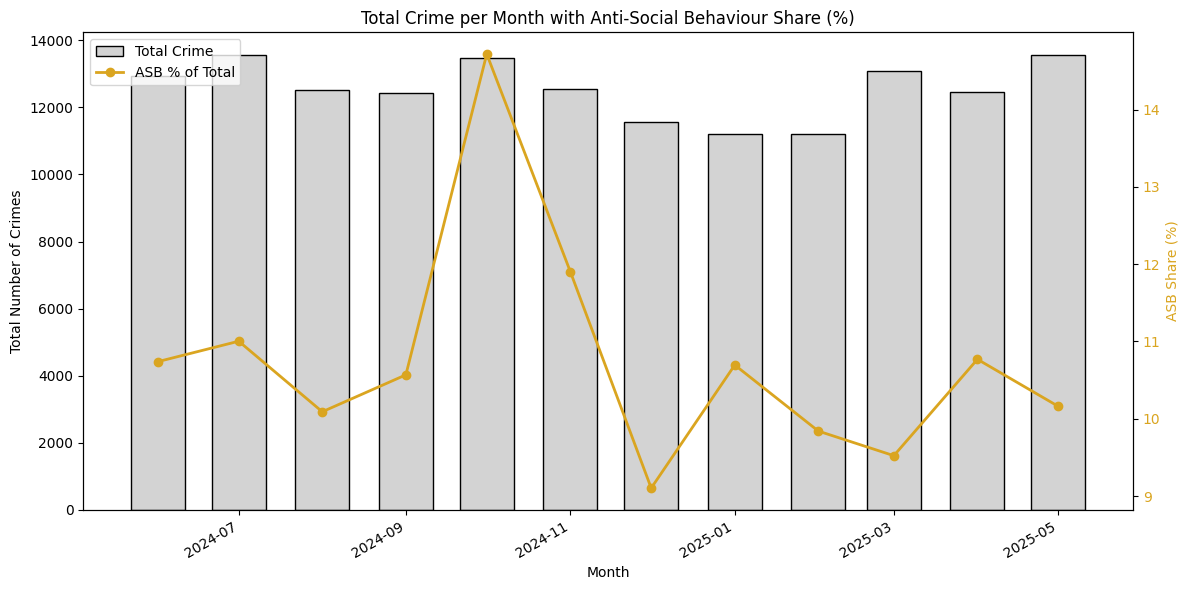

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Check if 'crime_group' exists, fallback to 'crime_type' if not
if 'crime_group' in df.columns:
    asb_filter = df['crime_group'] == 'Anti-Social Behaviour'
else:
    # Fallback condition based on raw crime_type
    asb_filter = df['crime_type'].str.lower().str.contains('anti-social')

# Convert month column
df['month'] = pd.to_datetime(df['month'])
df['month_period'] = df['month'].dt.to_period('M')

# Total crime per month
total_by_month = df.groupby('month_period').size()

# ASB per month
asb_by_month = df[asb_filter].groupby('month_period').size()

# Calculate % share
asb_share = (asb_by_month / total_by_month * 100).fillna(0)

# Convert PeriodIndex to timestamps for plotting
months = total_by_month.index.to_timestamp()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: total crimes (thicker bars)
bars = ax1.bar(months, total_by_month, width=20, color='lightgrey', edgecolor='black', label='Total Crime')
ax1.set_ylabel('Total Number of Crimes', color='black')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Total Crime per Month with Anti-Social Behaviour Share (%)')

# Line chart: ASB share
ax2 = ax1.twinx()
ax2.plot(months, asb_share, color='#DAA520', marker='o', linewidth=2, label='ASB % of Total')
ax2.set_ylabel('ASB Share (%)', color='#DAA520')
ax2.tick_params(axis='y', labelcolor='#DAA520')

# Format x-axis
fig.autofmt_xdate()

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/october_asb_spike.png')
plt.show()


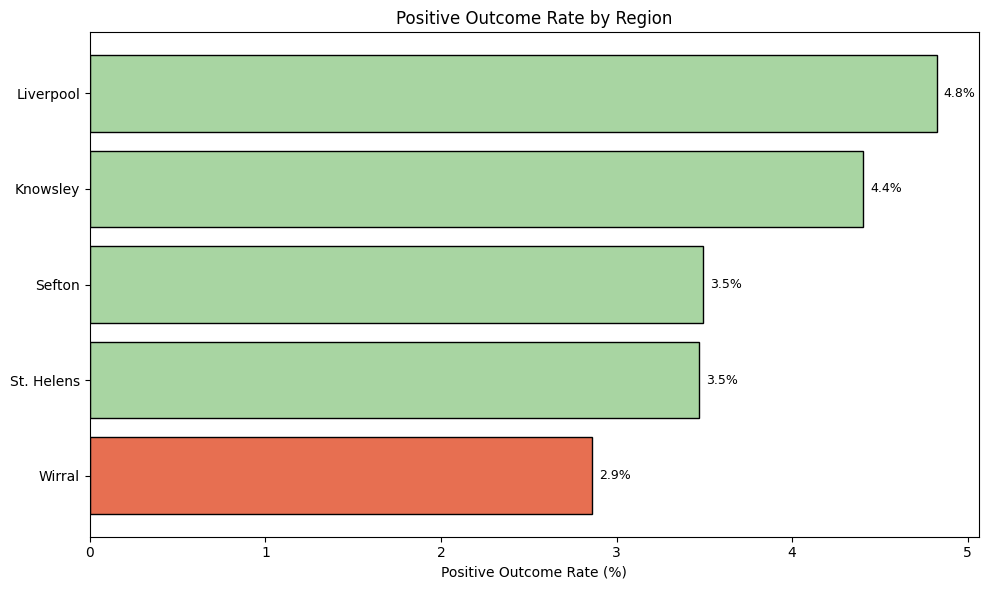

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# If 'outcome_group' isn't already defined, map it from 'last_outcome_category'
outcome_mapping = {
    'Investigation complete; no suspect identified': 'Negative',
    'Unable to prosecute suspect': 'Negative',
    'Further investigation is not in the public interest': 'Negative',
    'Status update unavailable': 'Negative',
    'Awaiting court outcome': 'Neutral',
    'Court case unable to proceed': 'Neutral',
    'Offender deprived of property': 'Positive',
    'Offender given a drugs possession warning': 'Positive',
    'Offender given penalty notice': 'Positive',
    'Suspect charged': 'Positive',
    'Suspect charged as part of another case': 'Positive',
    'Defendant sent to Crown Court': 'Positive',
    'Local resolution': 'Positive',
    'Offender fined': 'Positive',
    'Offender given community sentence': 'Positive',
    'Offender given suspended prison sentence': 'Positive',
    'Offender sent to prison': 'Positive',
    'Other': 'Neutral',
    'Formal action is not in the public interest': 'Neutral',
    'Investigation complete; offender unknown': 'Negative',
    'No further action': 'Neutral',
    'Under investigation': 'Neutral'
}

# Apply mapping
df['outcome_group'] = df['last_outcome_category'].map(outcome_mapping).fillna('Neutral')


# Extract region from lsoa_name (first word)
df['region'] = df['lsoa_name'].str.extract(r'^([A-Za-z.]+)')

# Standardize 'St.' to 'St. Helens' for clarity
df['region'] = df['region'].replace({'St.': 'St. Helens'})

# Focus only on the 5 regions of interest
key_regions = ['Liverpool', 'Sefton', 'St. Helens', 'Wirral', 'Knowsley']
df = df[df['region'].isin(key_regions)]

# Calculate % of positive outcomes per region
total_by_region = df.groupby('region').size()
positive_by_region = df[df['outcome_group'] == 'Positive'].groupby('region').size()
percent_positive = (positive_by_region / total_by_region * 100).sort_values(ascending=True)

# Set colors — highlight Wirral
colors = ['#a8d5a2' if region != 'Wirral' else '#e76f51' for region in percent_positive.index]  # pastel green vs warm coral

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(percent_positive.index, percent_positive.values, color=colors, edgecolor='black')

# Labels
plt.xlabel('Positive Outcome Rate (%)')
plt.title('Positive Outcome Rate by Region')
for bar in bars:
    width = bar.get_width()
    plt.text(width+0.04, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/positive_outcome_by_region.png', dpi=300)
plt.show()

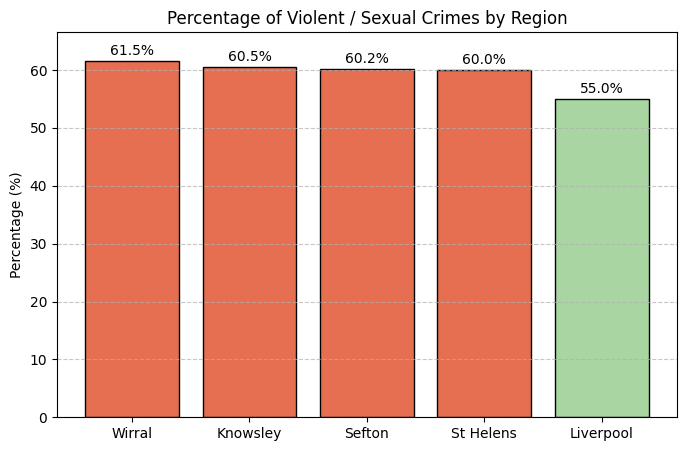

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is df and you already have the data loaded

# Map regions from lsoa_name
def map_region(lsoa_name):
    lsoa_name_lower = lsoa_name.lower()
    if lsoa_name_lower.startswith('knowsley'):
        return 'Knowsley'
    elif lsoa_name_lower.startswith('liverpool'):
        return 'Liverpool'
    elif lsoa_name_lower.startswith('sefton'):
        return 'Sefton'
    elif lsoa_name_lower.startswith('wirral'):
        return 'Wirral'
    elif lsoa_name_lower.startswith('st.'):
        return 'St Helens'
    else:
        return None

df['region'] = df['lsoa_name'].apply(map_region)

# Filter to only the five regions
regions_of_interest = ['Knowsley', 'Liverpool', 'Sefton', 'Wirral', 'St Helens']
df_regions = df[df['region'].isin(regions_of_interest)].copy()

# Map crime_group if missing
if 'crime_group' not in df_regions.columns:
    # You will need to define your crime_group mapping here or ensure it exists
    pass  # Add mapping logic if necessary

# Calculate total crimes by region
total_by_region = df_regions.groupby('region').size()

# Calculate violent / sexual crimes per region
violent_sexual = df_regions[df_regions['crime_group'] == 'Violent / Sexual'].groupby('region').size()

# Calculate percentage contribution of Violent / Sexual group
percent_violent_sexual = (violent_sexual / total_by_region * 100).sort_values(ascending=False)

# Prepare bar colors: Liverpool green, others red
colors = ['#a8d5a2' if region == 'Liverpool' else '#e76f51' for region in percent_violent_sexual.index]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(percent_violent_sexual.index, percent_violent_sexual.values, color=colors, edgecolor='black')

plt.title('Percentage of Violent / Sexual Crimes by Region')
plt.ylabel('Percentage (%)')
plt.ylim(0, percent_violent_sexual.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/violent_or_sexual_by_region.png', dpi=300)
plt.show()


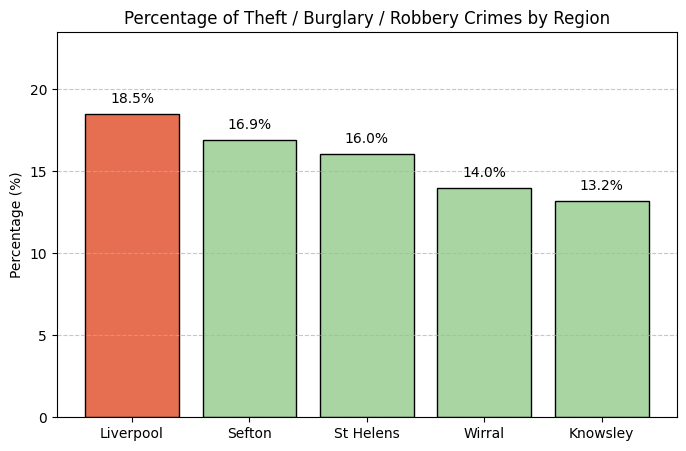

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Map regions function (reuse if needed)
def map_region(lsoa_name):
    lsoa_name_lower = lsoa_name.lower()
    if lsoa_name_lower.startswith('knowsley'):
        return 'Knowsley'
    elif lsoa_name_lower.startswith('liverpool'):
        return 'Liverpool'
    elif lsoa_name_lower.startswith('sefton'):
        return 'Sefton'
    elif lsoa_name_lower.startswith('wirral'):
        return 'Wirral'
    elif lsoa_name_lower.startswith('st.'):
        return 'St Helens'
    else:
        return None

df['region'] = df['lsoa_name'].apply(map_region)

regions_of_interest = ['Knowsley', 'Liverpool', 'Sefton', 'Wirral', 'St Helens']
df_regions = df[df['region'].isin(regions_of_interest)].copy()

# Calculate total crimes by region
total_by_region = df_regions.groupby('region').size()

# Calculate robbery / theft group crimes per region
robbery_theft = df_regions[df_regions['crime_group'] == 'Theft / Burglary / Robbery'].groupby('region').size()

# Calculate percentage contribution of Theft / Burglary / Robbery group
percent_robbery_theft = (robbery_theft / total_by_region * 100).sort_values(ascending=False)

# Prepare bar colors: Liverpool red, others green
colors = ['#e76f51' if region == 'Liverpool' else '#a8d5a2' for region in percent_robbery_theft.index]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(percent_robbery_theft.index, percent_robbery_theft.values, color=colors, edgecolor='black')

plt.title('Percentage of Theft / Burglary / Robbery Crimes by Region')
plt.ylabel('Percentage (%)')
plt.ylim(0, percent_robbery_theft.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/theftgroup_by_region.png', dpi=300)
plt.show()

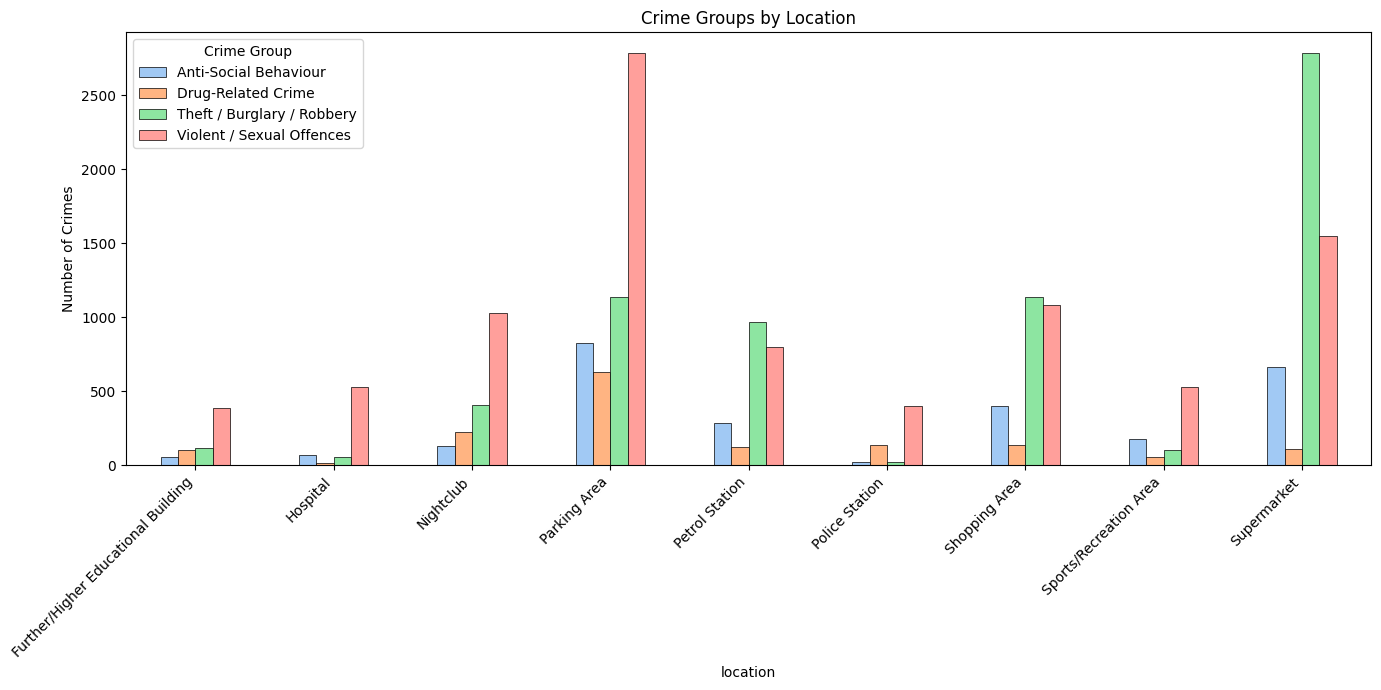

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your data is assumed loaded in `df`

# List of locations to include
locations_to_include = [
    "On or near Further/Higher Educational Building",
    "On or near Hospital",
    "On or near Nightclub",
    "On or near Parking Area",
    "On or near Petrol Station",
    "On or near Police Station",
    "On or near Shopping Area",
    "On or near Sports/Recreation Area",
    "On or near Supermarket"
]

# Map crime groups (adjust keys if your exact mapping differs)
crime_group_mapping = {
    'Anti-Social Behaviour': 'Anti-Social Behaviour',
    'Drug-Related Crime': 'Drug-Related Crime',
    'Theft / Burglary / Robbery': 'Theft / Burglary / Robbery',
    'Violent / Sexual': 'Violent / Sexual Offences',
    # Add other mappings if needed
}

# Filter data for locations and map crime groups
df_filtered = df[df['location'].isin(locations_to_include)].copy()

# Map the crime_group column for consistency
df_filtered['crime_group_mapped'] = df_filtered['crime_group'].map(crime_group_mapping)

# Keep only the 4 groups we're interested in
df_filtered = df_filtered[df_filtered['crime_group_mapped'].isin(crime_group_mapping.values())]

# Group by location and crime_group, count occurrences
grouped = df_filtered.groupby(['location', 'crime_group_mapped']).size().reset_index(name='count')

# Pivot for plotting
pivot_df = grouped.pivot(index='location', columns='crime_group_mapped', values='count').fillna(0)

# Sort locations to your list order
pivot_df = pivot_df.reindex(locations_to_include)

import seaborn as sns
import matplotlib.pyplot as plt

pastel_colors = sns.color_palette("pastel", n_colors=pivot_df.shape[1])
ax = pivot_df.plot(kind='bar', figsize=(14,7), color=pastel_colors)

# Add black edges with linewidth 1.5 to each bar
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.5)

new_labels = [label.get_text().replace('On or near ', '') for label in ax.get_xticklabels()]
ax.set_xticklabels(new_labels)

plt.ylabel('Number of Crimes')
plt.title('Crime Groups by Location')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Group')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/crime_group_by_location.png', dpi=300)
plt.show()


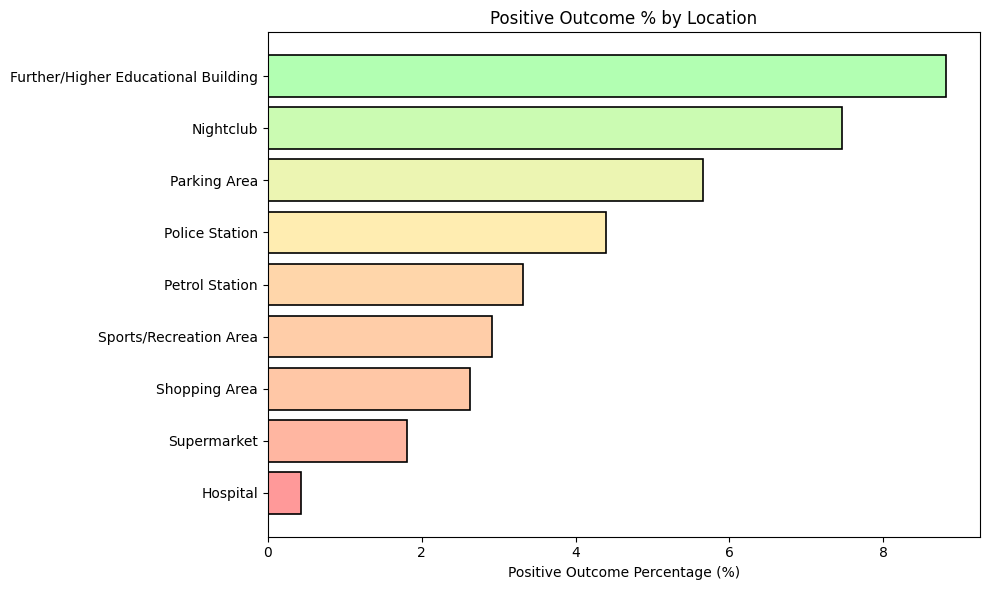

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Your 9 locations of interest
locations_of_interest = [
    'On or near Further/Higher Educational Building',
    'On or near Hospital',
    'On or near Nightclub',
    'On or near Parking Area',
    'On or near Petrol Station',
    'On or near Police Station',
    'On or near Shopping Area',
    'On or near Sports/Recreation Area',
    'On or near Supermarket'
]

# Filter the dataframe to these locations only
df_locations = df[df['location'].isin(locations_of_interest)].copy()

# Map outcome_group to consistent categories if needed (example mapping)
outcome_map = {
    'Investigation complete; no suspect identified': 'Negative',
    'Local resolution': 'Positive',
    'Unable to prosecute suspect': 'Negative',
    'Offender given a caution': 'Positive',
    'Offender charged': 'Positive',
    'Further investigation is not in the public interest': 'Negative',
    'No further action': 'Negative',
    # Add or adjust based on your dataset values
}

# Apply mapping (only if your df has last_outcome_category and you want to map to outcome_group)
if 'outcome_group' not in df_locations.columns or df_locations['outcome_group'].isnull().all():
    # Create outcome_group from last_outcome_category using the mapping
    df_locations['outcome_group'] = df_locations['last_outcome_category'].map(outcome_map).fillna('Exclude')

# Calculate total crimes per location
total_crimes = df_locations.groupby('location').size()

# Calculate positive outcomes per location
positive_outcomes = df_locations[df_locations['outcome_group'] == 'Positive'].groupby('location').size()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# ... [Your previous code up to positive_pct calculation remains unchanged] ...

# Create a pastel red-yellow-green colormap
pastel_colors = ['#ff9999', '#fff2b2', '#b2ffb2']  # pastel red, yellow, green
cmap = mcolors.LinearSegmentedColormap.from_list('pastel_r_y_g', pastel_colors)

# Normalize positive_pct values to [0,1] for color mapping
norm = mcolors.Normalize(vmin=positive_pct.min(), vmax=positive_pct.max())
colors = cmap(norm(positive_pct.values))

# Plot horizontal bar chart with pastel gradient colors and black edges
plt.figure(figsize=(10,6))
bars = plt.barh(positive_pct.index, positive_pct.values, color=colors, edgecolor='black', linewidth=1.2)

plt.xlabel('Positive Outcome Percentage (%)')
plt.title('Positive Outcome % by Location')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/positive_outcome_by_location.png', dpi=300)
plt.show()

